Installing necessary libraries

In [ ]:
!pip install spacy
!python3 -m nltk.downloader wordnet
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/

Import libraries

In [8]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import spacy

from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *

Get the dataset

In [ ]:
!wget http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
!tar -xf MovieSummaries.tar.gz

Tokenize the dataset with NLTK and visualize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      42303 non-null  int64 
 1   text    42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


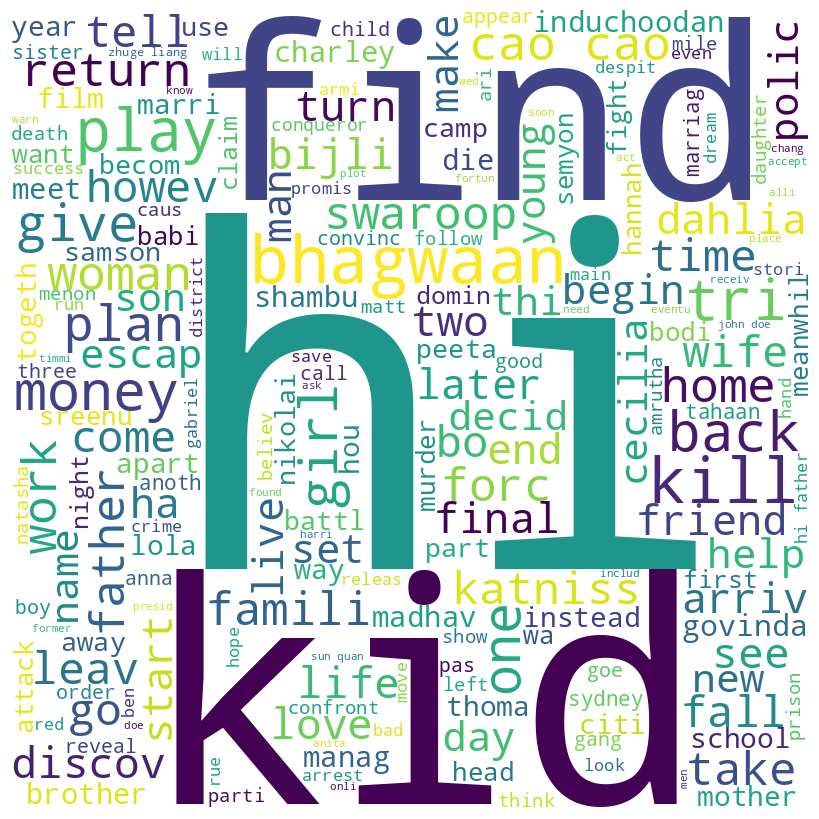

In [10]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# read as dataframe
df_english = pd.read_csv('/content/MovieSummaries/plot_summaries.txt', delimiter = '\t',names=['id','text'])
df_english.info()
df_english = df_english.head(50)

# normalize and tokenize
token_list_nltk = []
tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(df_english)):
  content = df_english['text'][i]
  token_list_nltk.append(tokenizer.tokenize(content))

# remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
for text_tokens in token_list_nltk:
  for word in text_tokens:
    if word in list(stop_words):
      text_tokens.remove(word)

# add to data frame
df_english['tokenizedTextNLTK'] = token_list_nltk

# stemming
stemmer = PorterStemmer()

stem_list_nltk = []
for each_list in token_list_nltk:
  each_list_stems = []
  for word in each_list:
    each_list_stems.append(stemmer.stem(word))
  stem_list_nltk.append(each_list_stems)

# add to data frame
df_english['stemmedTextNLTK'] = token_list_nltk

# lemmatize
lemmatizer = WordNetLemmatizer()

lemma_list_nltk = []
for each_list in stem_list_nltk:
  each_list_lemmas = []
  for word in each_list:
    each_list_lemmas.append(lemmatizer.lemmatize(word))
  lemma_list_nltk.append(each_list_lemmas)

# add to data frame
df_english['lemmatizedTextNLTK'] = token_list_nltk

# save csv
df_english.head()
df_english.to_csv('englishNLTK.csv')

# generate wordcloud
tokens_string_nltk = ''

for each_list in lemma_list_nltk:
  for word in each_list:
    tokens_string_nltk += word + ' '

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(tokens_string_nltk)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloudNLTK.png', dpi=400)

Normalize, lemmatize english dataset with spaCY and visualize; note that no stemming is available for spaCY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      42303 non-null  int64 
 1   text    42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


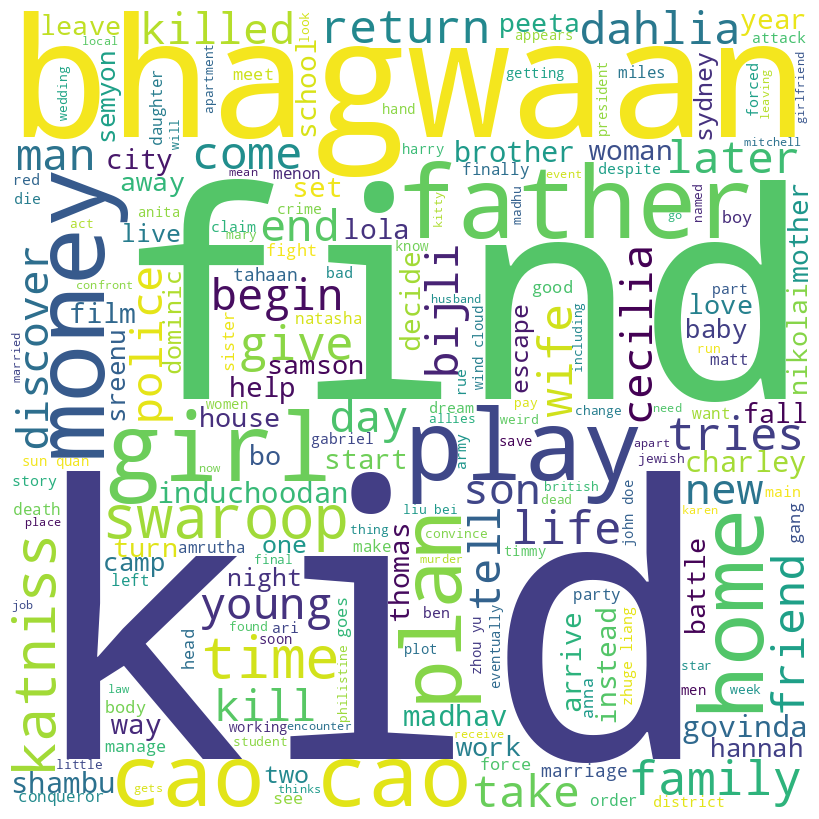

In [11]:
# read as dataframe
df_english = pd.read_csv('/content/MovieSummaries/plot_summaries.txt', delimiter = '\t',names=['id','text'])
df_english.info()
df_english = df_english.head(50)

def remove_punctuations(normalized_tokens):
    punctuations=['?',':','!',',','.',';','|','(',')','--','-']
    for word in normalized_tokens:
        if word in punctuations:
            normalized_tokens.remove(word)
    return normalized_tokens

# just keeping pos tagger and lemmatizer
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner',
                                            'tok2vec', 'attribute_ruler'])
lemma_list_spcy = []
for i in range(len(df_english)):
  content = df_english['text'][i]
  doc = nlp(content)
  content_lemma_list = []
  for token in doc:
    content_lemma_list.append(token.lemma_)
  lemma_list_spcy.append(content_lemma_list)

for each_list in lemma_list_spcy:
  for word in each_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == True:
        each_list.remove(word)
  each_list = remove_punctuations(each_list)

# add to data frame
df_english['lemmatizeTextSpcy'] = lemma_list_spcy

# save csv
df_english.head()
df_english.to_csv('englishSpcy.csv')

# generate wordcloud
tokens_string_spcy = ''

for each_list in lemma_list_spcy:
  for word in each_list:
    tokens_string_spcy += word + ' '

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(tokens_string_spcy)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloudSPCY.png', dpi=400)

Spacy vs NLTK :

- spacy can not stem while nltk can
- spacy makes less tokens with the same text given compared to nltk
- for small texts spacy takes more time
- for large scale text spacy is more efficient